In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
import re
import os
from matplotlib.patches import ConnectionPatch
from pprint import pprint
from sklearn.metrics import average_precision_score
from random import sample

In [5]:
project_root = '/home/davidboja/PycharmProjects/FER/hpatches-benchmark/python/ISPA'

In [6]:
folders = glob.glob(project_root + '/hpatches-sequences-release/*')

# IMPLEMENTATIONS

#### SHI TOMASI

In [4]:
class ShiTomasi():
    '''
    other parameters are left to the default OpenCv parameters
    '''
    def __init__(self, maxCorners=1000000, qualityLevel=0.01,minDistance=10):
        self.maxCorners = maxCorners
        self.qualityLevel = qualityLevel
        self.minDistance = minDistance
        
    def detect(self, img, mask=None):
        keypoints = []
        
        # Already taken care of in the implementation
        # if len(img.shape) == 3:
        #     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
        corners = cv2.goodFeaturesToTrack(img,
                                          self.maxCorners,
                                          self.qualityLevel,
                                          self.minDistance)
        corners = np.int0(corners)
        corners = corners[:,0,:]
        
        for i in range(corners.shape[0]):
              keypoints.append(cv2.KeyPoint(x=int(corners[i,0]), 
                                            y=int(corners[i,1]), 
                                            _size=0))
        
        return keypoints

#### CALVIN HARRIS

In [33]:
class HarrisMataHarris():
    def __init__(self, blockSize=2, ksize=3, k=0.04, borderType=cv2.BORDER_DEFAULT):
#         self.src = src
        self.blockSize = blockSize
        self.ksize = ksize
        self.k = k
        self.borderType = borderType
        
    def detect(self, img, mask=None):
        keypoints = []
        
        # already taking care of this in the implementation
        # if len(img.shape) == 3:
        #     img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            
        dst = cv2.cornerHarris(img,self.blockSize,self.ksize,self.k)
        indexes = np.where(dst>0.01*dst.max())
        
        for i in range(len(indexes[0])):
              keypoints.append(cv2.KeyPoint(x=int(indexes[1][i]), y=int(indexes[0][i]), _size=0))
        
        return keypoints

# TESTING

In [529]:
img = cv2.imread(folders[0] + '/1.ppm')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)

In [536]:
corners = np.int0(corners)

In [543]:
corners = corners[:,0,:]

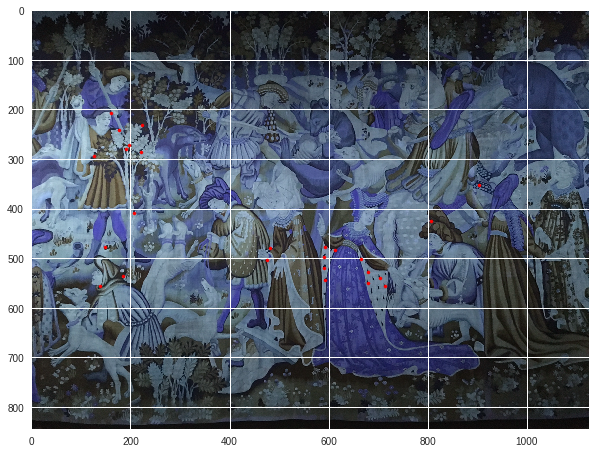

In [547]:
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.scatter(corners[:,0],corners[:,1],s=10,c='red')

In [549]:
img = cv2.imread(folders[0] + '/1.ppm')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
shi = ShiTomasi()
kp = shi.detect(img,None)

In [551]:
kp_np = np.array([(k.pt[0], k.pt[1], k.angle, k.size, k.response) for k in kp])

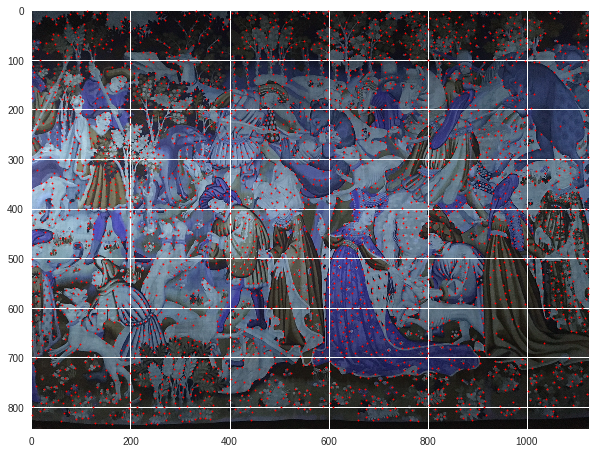

In [553]:
# for k in kp:
#     img[int(k.pt[0]),int(k.pt[1]),:] = [255,0,0]

plt.figure(figsize=(10,10))
plt.scatter(kp_np[:,0],kp_np[:,1], s=2, color='red')
plt.imshow(img)

In [105]:
img = cv2.imread(folders[0] + '/6.ppm')

In [106]:
harimatahari = HarrisMataHarris()

In [107]:
kp = harimatahari.detect(img,None)

In [108]:
kp_np = np.array([(k.pt[0], k.pt[1], k.angle, k.size, k.response) for k in kp])

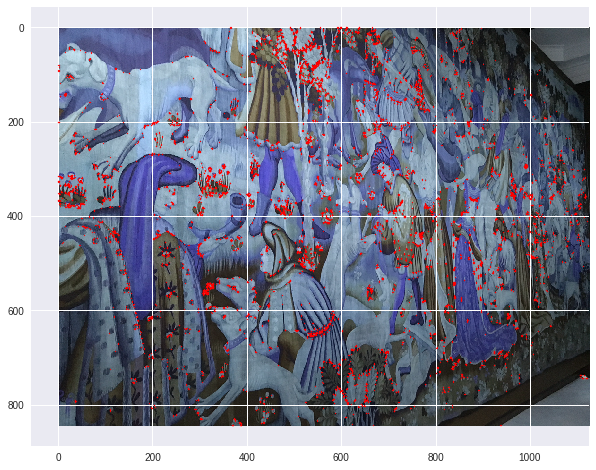

In [109]:
# for k in kp:
#     img[int(k.pt[0]),int(k.pt[1]),:] = [255,0,0]

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.scatter(kp_np[:,0],kp_np[:,1], s=1, color='red')

<Figure size 720x720 with 0 Axes>

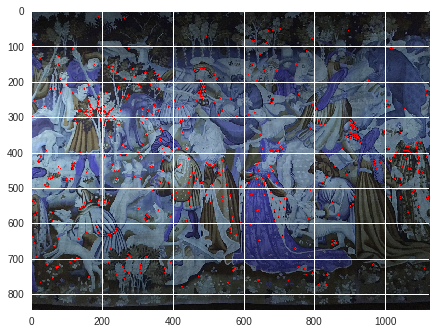

<Figure size 720x720 with 0 Axes>

In [67]:
img2 = cv2.imread(folders[0] + '/1.ppm')
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
dst = cv2.cornerHarris(gray,2,3,0.04)
img2[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(img2)
plt.figure(figsize=(10,10))

In [70]:
# MOJ NACIN ISPISAN
img3 = cv2.imread(folders[0] + '/1.ppm')
gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

dst = cv2.cornerHarris(gray,2,3,0.04)
indexes = np.where(dst>0.01*dst.max())

In [71]:
indexes

(array([  0,   0,   0, ..., 829, 829, 829]),
 array([313, 680, 928, ..., 306, 781, 829]))

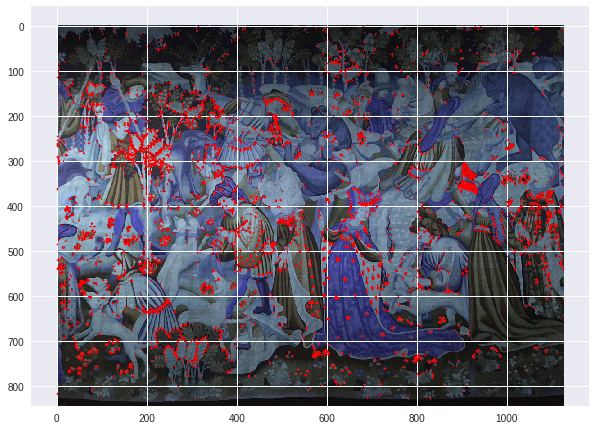

In [72]:
plt.figure(figsize=(10,10))
plt.imshow(img3)
plt.scatter(indexes[1],indexes[0],s=1,c='red')

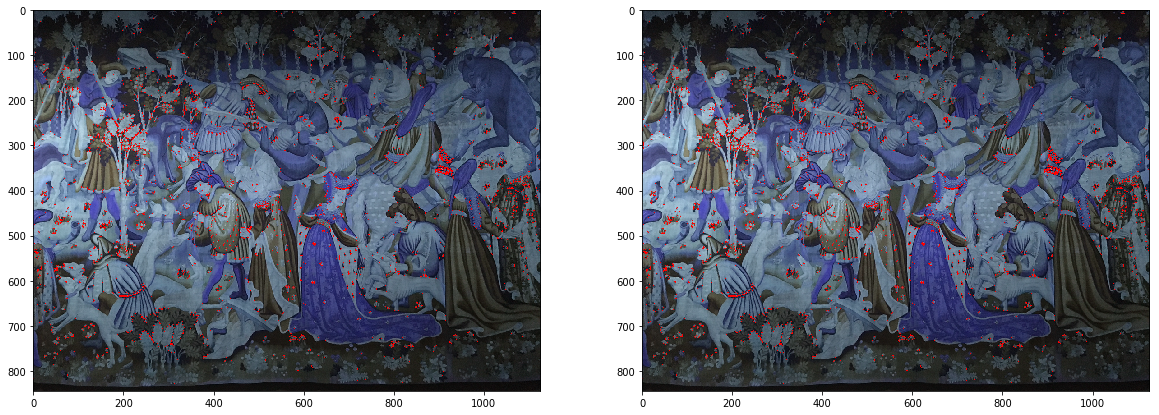

In [262]:
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,20))

ax1.imshow(img2)

img = cv2.imread(folders[0] + '/1.ppm')
harimatahari = HarrisMataHarris()
kp = harimatahari.detect(img,None)

img = cv2.imread(folders[0] + '/1.ppm')

# ax2.imshow(img)
# ax2.scatter([kp_.pt[0] for kp_ in kp],[kp_.pt[1] for kp_ in kp],s=0.01,c='red')
for k in kp:
    img[int(k.pt[0]),int(k.pt[1]),:] = [255,0,0]
    
ax2.imshow(img)

In [426]:
ime = folders[0][:-6] + 'v_weapons/6.ppm'

In [427]:
ime

'/home/davidboja/PycharmProjects/FER/hpatches-benchmark/python/ISPA/hpatches-sequences-release/v_weapons/6.ppm'

In [428]:
img = cv2.imread(ime)

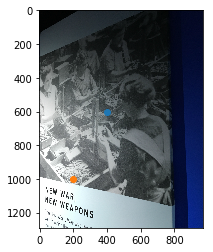

In [429]:
plt.imshow(img)
plt.scatter(400,600)
plt.scatter(200,1000)

In [430]:
harimatahari = HarrisMataHarris()
kp = harimatahari.detect(img,None)

In [431]:
kp_np = np.array([(k.pt[0], k.pt[1], k.angle, k.size, k.response) for k in kp])

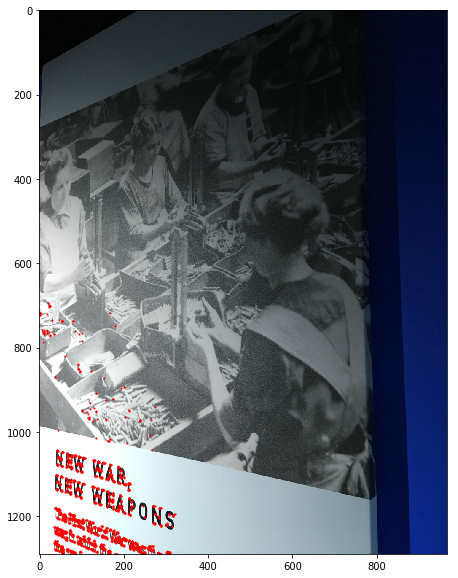

In [433]:
# for k in kp:
#     img[int(k.pt[0]),int(k.pt[1]),:] = [255,0,0]

plt.figure(figsize=(10,10))
plt.scatter(kp_np[:,0],kp_np[:,1], s=1, color='red')
plt.imshow(img)

### KAZE

In [7]:
img = cv2.imread(folders[0] + '/1.ppm')

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

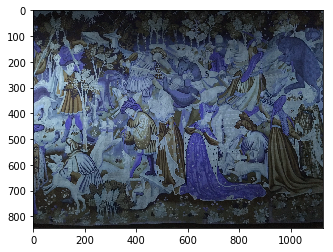

In [9]:
plt.imshow(img)

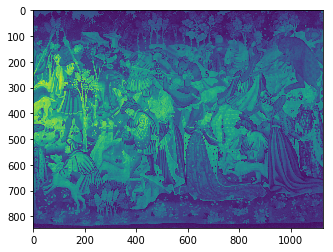

In [10]:
plt.imshow(gray)

In [11]:
akaze = cv2.AKAZE_create()

In [12]:
kp = akaze.detect(gray,None)

In [13]:
len(kp)

3461

In [14]:
kp, des = akaze.compute(gray,kp)

In [15]:
des

array([[ 32, 125,   3, ..., 253, 255,  11],
       [  0, 238,   7, ..., 233, 255,  62],
       [ 33,  92,   3, ..., 134,   0,  30],
       ...,
       [101, 173, 237, ..., 222,  11,  32],
       [  0, 125,   0, ...,  95, 176,  48],
       [240, 125,   3, ..., 255, 206,  63]], dtype=uint8)

In [16]:
des.shape

(3461, 61)

In [28]:
kp[0].pt

(1065.0361328125, 4.39024019241333)